# 분류분석

- 다수의 변수를 갖는 데이터 셋을 대상으로 특정 변수값을 조건으로 지정하여 데이터를 분류하여 트리 형태의 모델을 생성하는 분석 방법.
- 의사결정 트리, 랜덤 포레스트, 인공신경망 등이 있다. 인공신경망은 트리구조와 성격을 달리하지만, 입력값 x를 투입하여 출력값 y를 분류한다는 측면에서 분류분석에 포함한다. 
- 분류분석의 과정 : 학습데이터를 이용하여 분류모델을 찾은 후에 새로운 데이터에 모델을 적용하여 분류 값을 예측한다. 
  - 예를 들면 대출 은행에서 기존 고객들의 데이터를 활용하여 신용상태의 분류모델을 생성한 후 새로운 고객에 대하여 향후 신용상태를 예측하는 데 이용한다. 
  - 또, 과거 환자들에 대한 종양 검사의 결과를 바탕으로 종양의 악성 또는 양성 여부를 분류하는 모델을 생성하고, 이를 통해서 새로운 환자에 대한 암을 진단하는 데 이용한다.

- 분류분석의 특징
  - y 변수 존재, 의사결정 트리, 비모수검정(선형성, 정규성, 등분산성 등의 가정이 필요없다), 추론 기능(유의수준 판단 기준이 없다)

---

- 의사결정 트리
  - 나무 구조 형태로 분류결과를 도출해내는 방식.
  - 입력 변수 중에서 가장 영향력이 있는 변수를 기준으로 이진 분류하여 분류결과를 나무 구조 형태로 시각화해준다.

In [5]:
library(party) # 분류분석 결과를 의사결정 트리 형태로 제공하는 함수 사용을 위한 패키지
library(datasets)
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [6]:
# formula 생성
formula = Temp ~ Solar.R + Wind + Ozone # (y ~ x1+x2+x3)

In [8]:
# 분류모델 생성
air_ctree = ctree(formula, data = airquality)
air_ctree


	 Conditional inference tree with 5 terminal nodes

Response:  Temp 
Inputs:  Solar.R, Wind, Ozone 
Number of observations:  153 

1) Ozone <= 37; criterion = 1, statistic = 56.086
  2) Wind <= 15.5; criterion = 0.993, statistic = 9.387
    3) Ozone <= 19; criterion = 0.964, statistic = 6.299
      4)*  weights = 29 
    3) Ozone > 19
      5)*  weights = 69 
  2) Wind > 15.5
    6)*  weights = 7 
1) Ozone > 37
  7) Ozone <= 65; criterion = 0.971, statistic = 6.691
    8)*  weights = 22 
  7) Ozone > 65
    9)*  weights = 26 

- 해당 결과에 대한 설명은 501p 참고

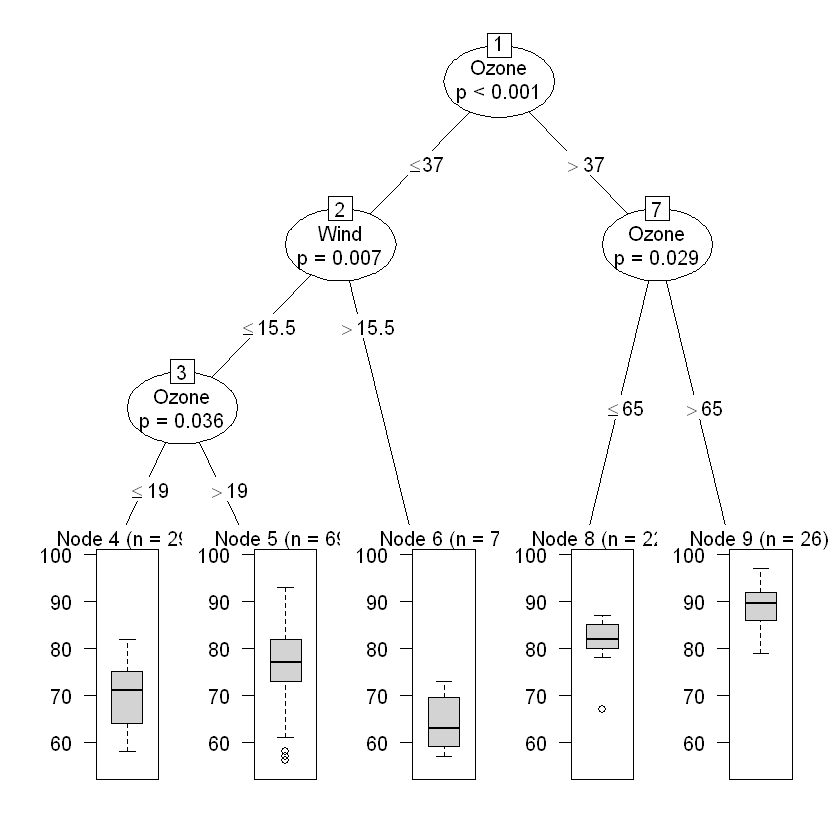

In [9]:
# 분류분석의 결과
plot(air_ctree)

- Ozone이 온도에 가장 큰 영향을 미치는 영향변수, 두 번째로 영향이 큰 영향 변수는 Wind이다. 

---

- 학습데이터와 검정데이터 샘플링으로 분류분석 수행
  - iris 데이터 셋을 대상으로 학습데이터와 검정데이터를 7:3 비율로 각각 샘플링하여 분류분석을 수행한다.

In [18]:
# 학습데이터와 검정데이터 샘플링
set.seed(1234)
idx = sample(1:nrow(iris), nrow(iris) * 0.7)
train = iris[idx,] # 학습데이터
test = iris[-idx,] # 검정데이터

# formula 생성
formula = Species ~ Sepal.Length + Sepal.Width + Petal.Width + Petal.Length

# 학습데이터 이용하여 분류모델 생성
iris_ctree = ctree(formula, data = train)
iris_ctree


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Width, Petal.Length 
Number of observations:  105 

1) Petal.Length <= 1.9; criterion = 1, statistic = 98.365
  2)*  weights = 34 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 47.003
    4) Petal.Length <= 4.6; criterion = 1, statistic = 14.982
      5)*  weights = 28 
    4) Petal.Length > 4.6
      6)*  weights = 8 
  3) Petal.Width > 1.6
    7)*  weights = 35 

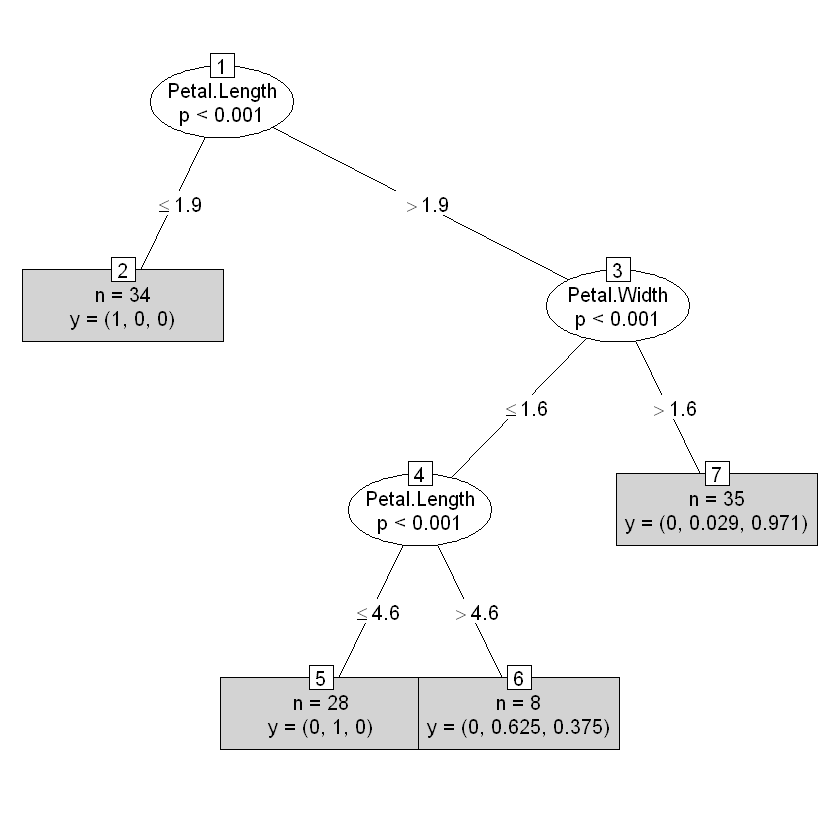

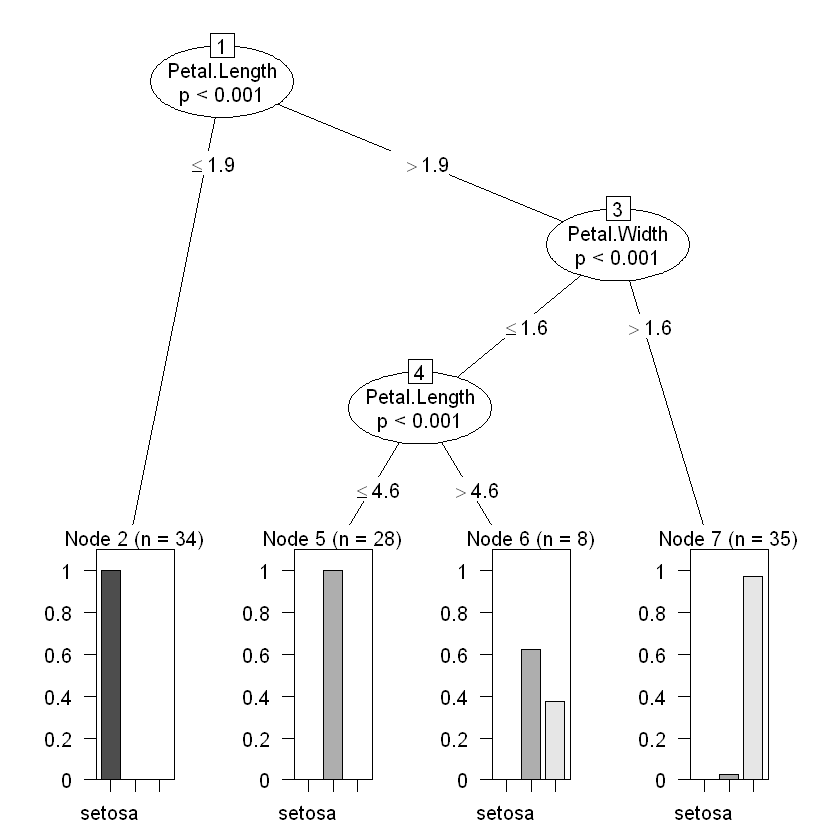

In [19]:
# 분류모델 시각화
plot(iris_ctree, type = 'simple')
plot(iris_ctree)

- 분석 결과, 분류모델의 결과에서 가장 중요한 변수는 Petal.Length와 Petal.Width로 나타난다. 

In [21]:
# 분류모델 평가
# 모델의 예측치 생성 
pred = predict(iris_ctree, test)
# 혼돈 매트릭스 생성
table(pred, test$Species)

# 분류 정확도 구하기
(16 + 15 + 12) / nrow(test)

            
pred         setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         15         1
  virginica       0          1        12

[1] 0.9555556

- K겹 교차 검정 샘플링으로 분류 분석
  - iris 데이터 셋을 대상으로 K겹 교차 검정 방법으로 샘플링하여 분류분석을 수행한다. 

In [25]:
# K겹 교차 검정을 위한 샘플링 - 3겹, 2회 반복
library(cvTools)
cross = cvFolds(nrow(iris), K=3, R=2)

# cross 구조
str(cross)

List of 5
 $ n      : num 150
 $ K      : num 3
 $ R      : num 2
 $ subsets: int [1:150, 1:2] 101 54 19 105 39 16 108 21 122 25 ...
 $ which  : int [1:150] 1 2 3 1 2 3 1 2 3 1 ...
 - attr(*, "class")= chr "cvFolds"


In [30]:
# 3겹 교차 검정 데이터 보기
# cross

In [33]:
length(cross$which)
table(cross$which)

[1] 150


 1  2  3 
50 50 50 

In [36]:
# K겹 교차 검정 수행
R = 1:2
K = 1:3
CNT = 0 # 카운터 변수 -> 1차 테스트
ACC = numeric() # 분류정확도 저장 -> 2차 모델 생성

for(r in R){
    cat('\n R =', r, '\n')
    for(k in K){
        
        # test 생성
        datas_idx = cross$subsets[cross$which == k,r]
        test = iris[datas_idx,]
        cat('test: ', nrow(test), '\n')
        
        # train 생성
        formula = Species~.
        trian = iris[-datas_idx,]
        cat('train : ', nrow(train), '\n')
        
        # model 생성
        model = ctree(Species ~. , data = train)
        pred = predict(model, test)
        t = table(pred, test$Species)
        print(t)
        
        # 분류정확도 추가
        CNT = CNT + 1
        ACC[CNT] = (t[1,1] + t[2,2] + t[3,3]) / sum(t)
        }}


 R = 1 
test:  50 
train :  105 
            
pred         setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         1
  virginica       0          1        17
test:  50 
train :  105 
            
pred         setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         20         0
  virginica       0          0        13
test:  50 
train :  105 
            
pred         setosa versicolor virginica
  setosa         19          0         0
  versicolor      0         11         3
  virginica       0          1        16

 R = 2 
test:  50 
train :  105 
            
pred         setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         17         2
  virginica       0          1        14
test:  50 
train :  105 
            
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         17         2
  virginica  

- 2중 for문에 의해서 6회전이 수행됨.

In [41]:
# 교차 검정 모델 평가
ACC
length(ACC)

[1] 0.96 1.00 0.92 0.94 0.94 1.00

[1] 6

In [42]:
# 최종 K겹 교차 검정 모델 평가 : 모델 평가결과 대상 산술평균
result_acc = mean(ACC, na.rm=T)
result_acc

[1] 0.96

- ACC 변수는 6개의 학습데이터에 의해서 생성된 모델의 분류정확도 6개를 저장한 vector 변수이다.
- K겹 교차 검정의 최종 모델 평가는 각 학습데이터에 의해서 생성된 모델 평가 결과를 대상으로 산술평균하여 결정한다. 

---

- 고속도로 주행거리에 미치는 영향변수 보기

In [43]:
install.packages('ggplot2')
library(ggplot2)
data(mpg)

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmpkr8c6j\downloaded_packages


In [44]:
# 학습데이터와 검정데이터 생성
t = sample(1:nrow(mpg), 120) # 120개 표본 샘플링
train = mpg[-t,] # 학습데이터
test = mpg[t,] # 검정데이터
dim(train);dim(test)

[1] 114  11

[1] 120  11

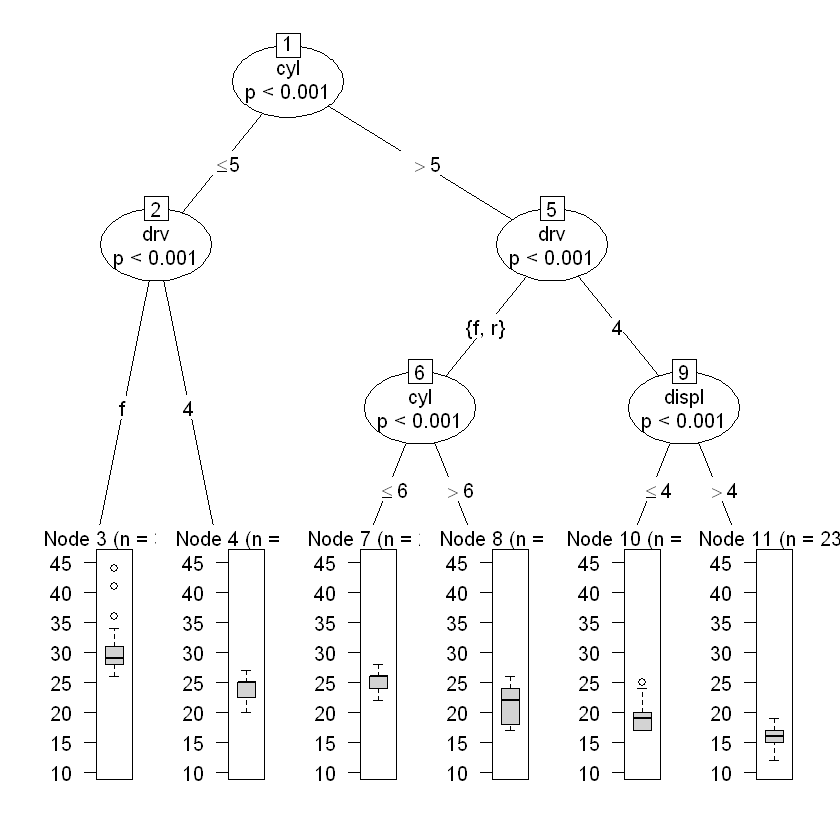

In [47]:
# formula 작성과 분류모델 생성
test$drv = factor(test$drv) # 구동 방식 칼럼을 요인형으로 형변환해주었음
formula = hwy ~ displ + cyl + drv
tree_model = ctree(formula, data = test) # tree 모델 생성
plot(tree_model)

- 엔진 크기가 작으면서 전륜이나 후륜 구동 방식인 경우 고속도로 주행거리가 가장 좋고, 반면에, 엔진 크기가 크고 사륜구동 방식이면서 실린더 수가 많은 경우 고속도로 주행거리가 작은 것으로 보인다. 

---

- AdultUCI 데이터 셋을 이용한 분류분석

In [48]:
install.packages('arules')
library(arules)
data('AdultUCI')
str(AdultUCI)
names(AdultUCI)

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmpkr8c6j\downloaded_packages


Loading required package: Matrix


Attaching package: 'arules'


The following object is masked from 'package:modeltools':

    info


The following objects are masked from 'package:base':

    abbreviate, write




'data.frame':	48842 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Ord.factor w/ 16 levels "Preschool"<"1st-4th"<..: 14 14 9 7 14 15 5 9 15 14 ...
 $ education-num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital-gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: int  40

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education-num"  "marital-status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital-gain"   "capital-loss"  
[13] "hours-per-week" "native-country" "income"

In [49]:
# 데이터 샘플링 - 10,000개 관측치 선택
set.seed(1234)
choice = sample(1:nrow(AdultUCI), 10000)
adult.df = AdultUCI[choice,]
str(adult.df)

'data.frame':	10000 obs. of  15 variables:
 $ age           : int  76 34 44 44 50 36 17 26 43 25 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 6 6 4 4 4 4 4 4 4 4 ...
 $ fnlwgt        : int  106430 201292 318046 368757 115284 207853 158704 147821 160246 135645 ...
 $ education     : Ord.factor w/ 16 levels "Preschool"<"1st-4th"<..: 5 12 13 13 15 14 6 14 13 15 ...
 $ education-num : int  5 11 10 10 14 13 6 13 10 14 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 3 3 3 3 3 3 5 5 1 5 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 5 5 12 7 3 12 12 12 10 12 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 1 1 1 1 1 1 4 4 5 2 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 5 5 5 5 5 3 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 1 1 2 ...
 $ capital-gain  : int  0 0 0 0 0 15024 0 0 0 0 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: in

In [50]:
# 변수 추출
capital = adult.df$'capital-gain'
hours = adult.df$'hours-per-week'
education = adult.df$'education-num'
race = adult.df$race
age = adult.df$age
income = adult.df$income

# 데이터 프레임 생성
adult_df = data.frame(capital = capital, age = age, race = race,
                     hours = hours, education = education, income = income)
str(adult_df)

# formula 생성
formula = capital ~ income + education + hours + race + age

# 분류모델 생성 및 예측
adult_ctree = ctree(formula, data = adult_df)
adult_ctree

'data.frame':	10000 obs. of  6 variables:
 $ capital  : int  0 0 0 0 0 15024 0 0 0 0 ...
 $ age      : int  76 34 44 44 50 36 17 26 43 25 ...
 $ race     : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 5 5 5 5 5 3 5 ...
 $ hours    : int  40 50 35 40 40 65 20 45 40 20 ...
 $ education: int  5 11 10 10 14 13 6 13 10 14 ...
 $ income   : Ord.factor w/ 2 levels "small"<"large": NA NA NA 1 NA NA 1 1 1 1 ...



	 Conditional inference tree with 10 terminal nodes

Response:  capital 
Inputs:  income, education, hours, race, age 
Number of observations:  10000 

1) income <= small; criterion = 1, statistic = 324.284
  2) education <= 14; criterion = 1, statistic = 96.537
    3) hours <= 49; criterion = 1, statistic = 54.964
      4) age <= 34; criterion = 1, statistic = 54.112
        5)*  weights = 3469 
      4) age > 34
        6) education <= 11; criterion = 1, statistic = 29.521
          7)*  weights = 2757 
        6) education > 11
          8) hours <= 43; criterion = 0.954, statistic = 6.762
            9)*  weights = 640 
          8) hours > 43
            10)*  weights = 101 
    3) hours > 49
      11) education <= 13; criterion = 1, statistic = 19.25
        12) education <= 12; criterion = 0.981, statistic = 8.355
          13)*  weights = 931 
        12) education > 12
          14)*  weights = 269 
      11) education > 13
        15)*  weights = 117 
  2) education > 14
   

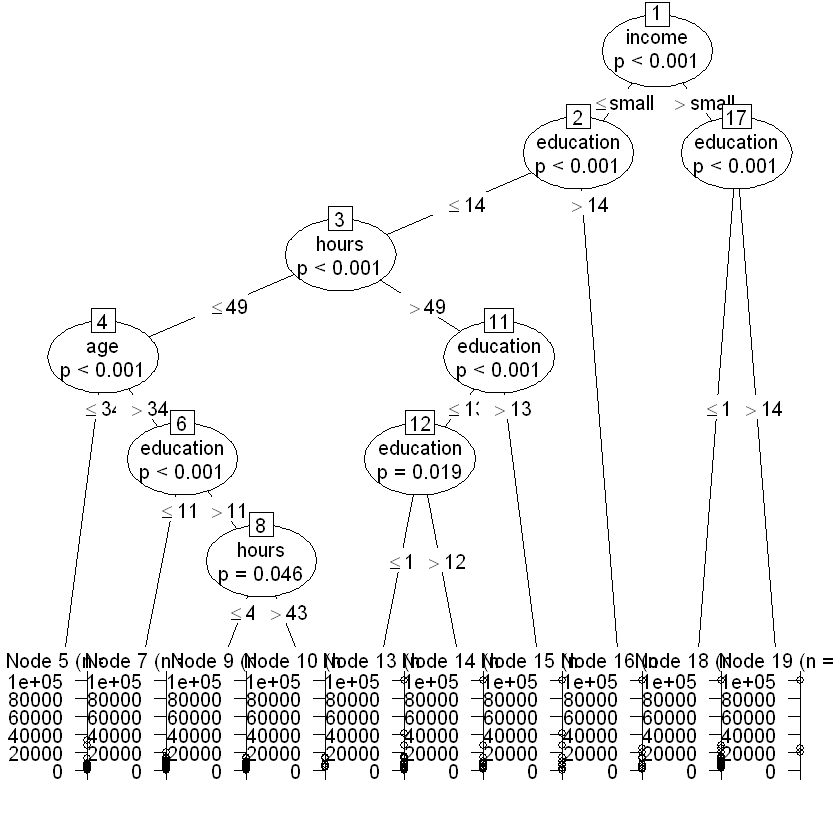

In [51]:
# 분류모델 시각화
plot(adult_ctree)

- capital에 가장 큰 영향을 미치는 변수는 income이고 그 다음은 education이다

[1] 139

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   15.00   15.00   15.37   16.00   16.00 

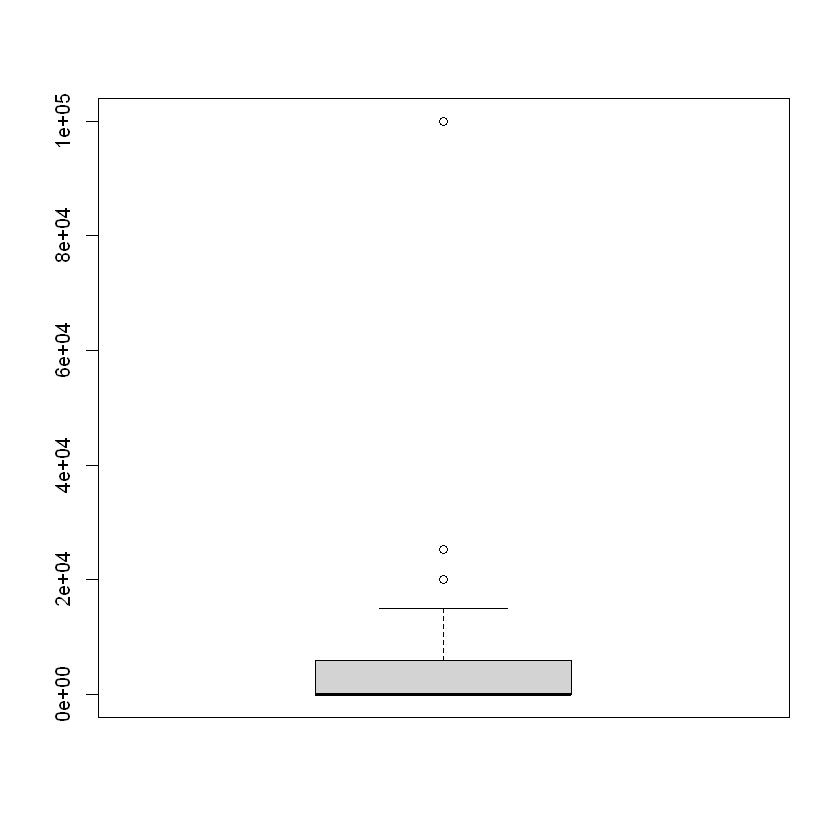

In [52]:
# capital 요약통계량 보기
adultResult = subset(adult_df, adult_df$income == 'large' & adult_df$education > 14)
length(adultResult$education)
summary(adultResult$education)
boxplot(adultResult$capital)

---

- rpart 패키지를 이용한 분류분석
  - rpart() 함수는 재귀분할(recursive partitioning)의 의미가 있다. 기존 ctree() 함수에 비해서 2수준 요인으로 분산분석을 실행한 결과를 트리 형태로 제공하여 모형을 단순화해주기 때문에 전체적인 분류기준을 쉽게 분석할 수 있는 장점이 있다. 

In [53]:
install.packages('rpart')
library(rpart)
install.packages('rpart.plot')
library(rpart.plot)
data(iris)

rpart_model = rpart(Species ~. , data = iris)
rpart_model

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmpkr8c6j\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmpkr8c6j\downloaded_packages


n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

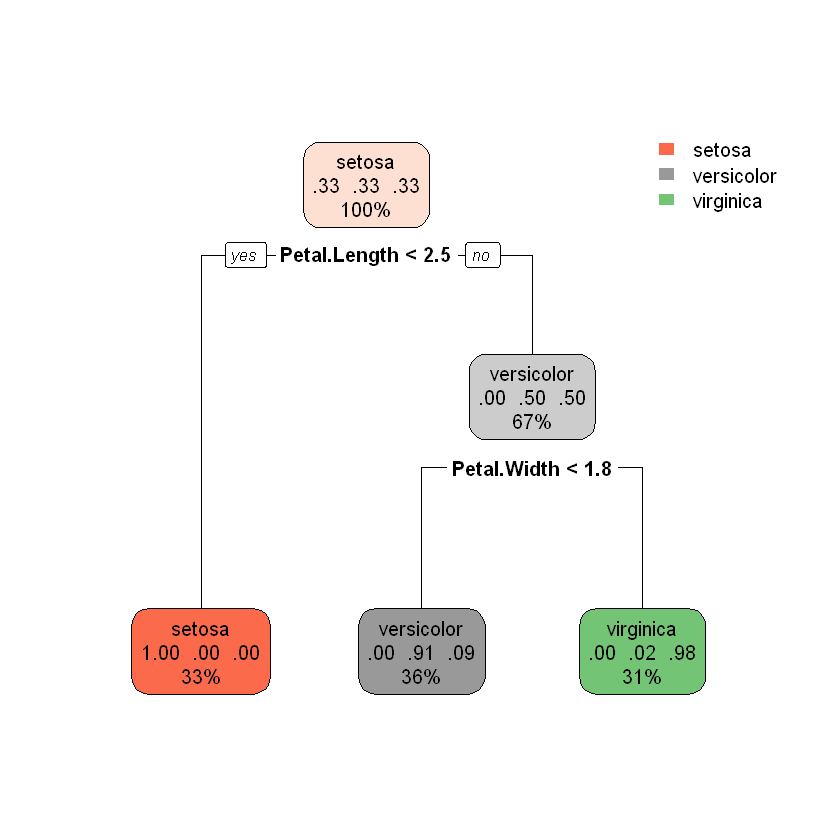

In [55]:
# 분류분석 시각화
rpart.plot(rpart_model)

- 마지막 노드에는 반응변수의 결과값이 나타난다. 

---

- 날씨 데이터를 이용하여 비(rain) 유무 예측

In [56]:
weather = read.csv('weather.csv', header=T)

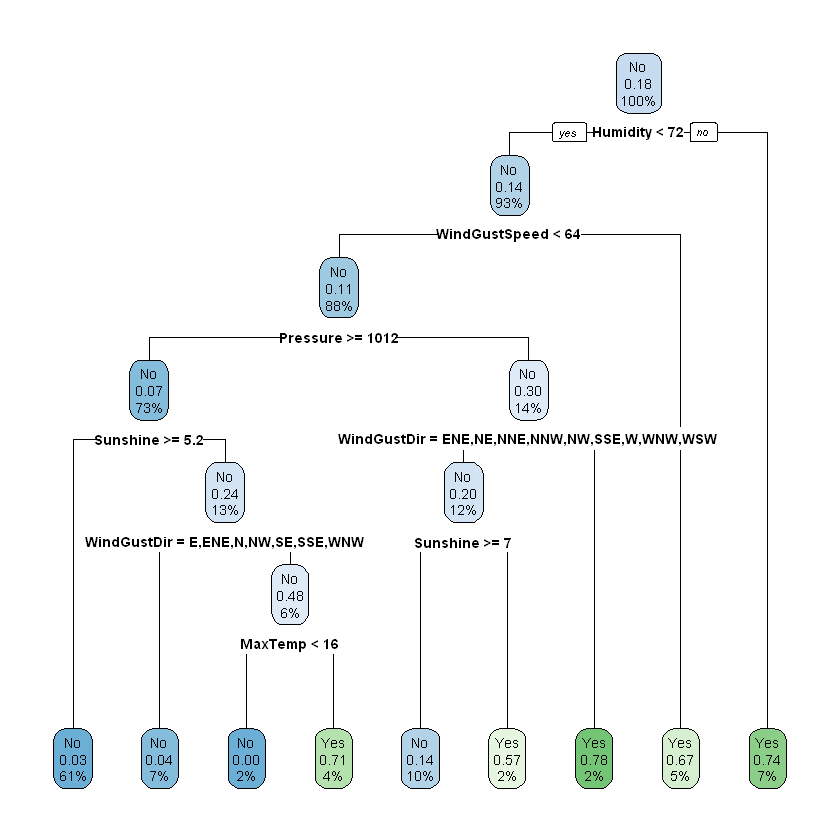

In [58]:
weather.df = rpart(RainTomorrow~., data = weather[,c(-1,-14)], cp = 0.01)
# 날씨 요인과 관련이 없는 Date와 RainyToday 칼럼은 제외한다. 
# cp 속성값을 높이면 가지 수가 적어지고 낮추면 가지 수가 많아진다. cp의 default값은 0.01이다.

# 분류분석 시각화
rpart.plot(weather.df)

In [59]:
# 예측치 생성
weather_pred = predict(weather.df, weather)
weather_pred

,No,Yes
1,0.9684685,0.03153153
2,0.8648649,0.13513514
3,0.3333333,0.66666667
4,0.8648649,0.13513514
5,0.9684685,0.03153153
6,0.9684685,0.03153153
7,0.9684685,0.03153153
8,0.9600000,0.04000000
9,0.2857143,0.71428571
10,0.9684685,0.03153153


In [60]:
# y의 점주로 코딩 변환 
weather_pred2 = ifelse(weather_pred[,2] >= 0.5 , 'Yes', 'No')

In [61]:
# 잘 분류했는지 대강 확인해보자
table(weather_pred2, weather$RainTomorrow)

             
weather_pred2  No Yes
          No  278  13
          Yes  22  53

In [62]:
# 정확도?
(278 + 53)/ nrow(weather)

[1] 0.9043716